In [1]:
import sqlite3
import pandas as pd
import numpy as np
import sys
sys.path.append('C:/Users/Archiebald/Moons/Task_1')
from jupiter import Moons

In [2]:
sys.path.append('C:/Users/Archiebald/Moons/Task_1')

In [3]:
jupiter_moons = Moons("jupiter_kepler.db", "data/")

In [4]:
jupiter_moons.all_data().head()

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00


In [5]:
jupiter_moons.convert_distance("km", "distance_km")
jupiter_moons.convert_time("days","period_days")
jupiter_moons.gen_sma("semi_major_axis","distance_m","ecc")
jupiter_moons.prepare_data("period_s","distance_m")

In [6]:
jupiter_moons.all_data().head()

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg,distance_m,period_s,semi_major_axis,T_squared,a_cubed
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03,1.290000e+08,25747.2,1.291938e+08,6.629183e+08,2.146689e+24
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00,2.323100e+10,63072000.0,3.156386e+10,3.978077e+15,1.253729e+31
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37,1.814000e+08,43027.2,1.819805e+08,1.851340e+09,5.969141e+24
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60,2.130000e+10,54432000.0,2.580957e+10,2.962843e+15,9.663597e+30
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00,2.400000e+10,65750400.0,4.225352e+10,4.323115e+15,1.382400e+31


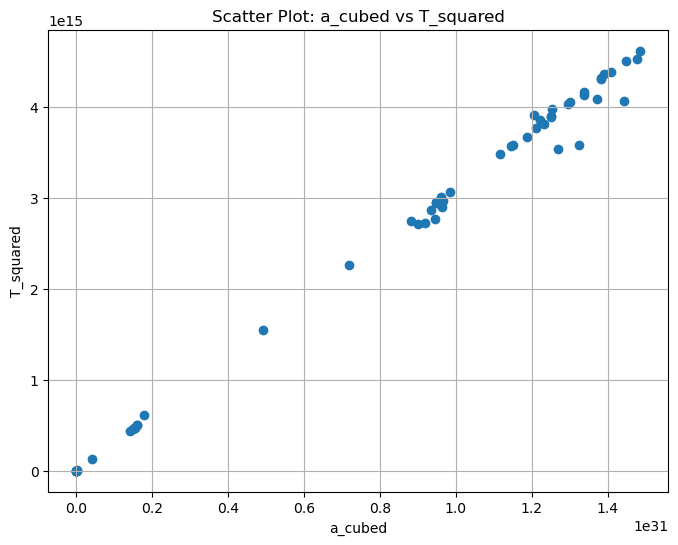

In [7]:
jupiter_moons.plot_scatter("T_squared","a_cubed")

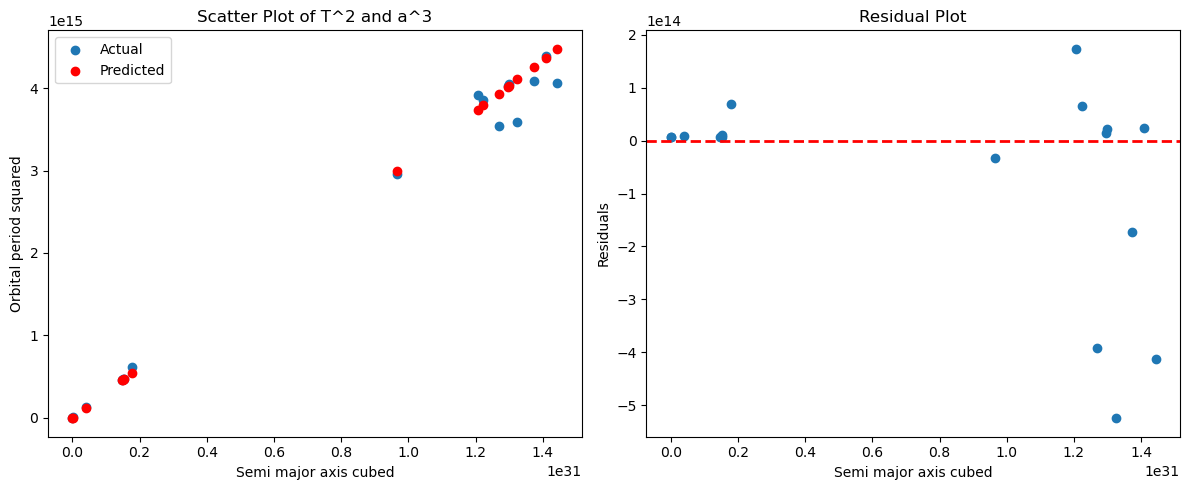

 r2_Score: 0.9874698094589166
mean squared error: 3.9427519223478265e+28
Line gradient from model:  [3.10779319e-16]


In [8]:
jupiter_moons.test_train("T_squared","a_cubed")

In [10]:
jupiter_moons.estimate_planet_mass()

TypeError: unsupported format string passed to numpy.ndarray.__format__